In [1]:
import gymnasium as gym
import numpy as np
import random
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
desc=["SFFF", "FHHH", "FFFF", "HFHF", "FFGF"]

env = gym.make('FrozenLake-v1', desc=desc, map_name="5x5", is_slippery=False) 
observation, info = env.reset()

In [3]:
def calculate_percentage_change(old_q_table, new_q_table):
    """
    Calculate the percentage change in Q-values between two Q-tables.

    Parameters:
        old_q_table (numpy.ndarray): The old Q-table.
        new_q_table (numpy.ndarray): The new Q-table.

    Returns:
        float: The percentage change in Q-values.
    """
    q_diff = np.abs(new_q_table - old_q_table)
    avg_change = np.mean(q_diff)
    old_avg = np.mean(old_q_table)
    return (avg_change / old_avg) * 100

In [4]:
# Define parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.01  # Epsilon-greedy parameter
num_episodes = 5000

# Initialize Q-values
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

statistics = pd.DataFrame({
    "Time": [],
    "Episode": [],
    "Q-Difference": [],
    "GotGift": []
})

# Q-learning algorithm
start_time = time.time()
for episode in range(num_episodes):
    state = env.reset()[0]
    done = False
    
    gotGift = False
    
    steps = []
    
    arr_copy = Q.copy()
    
    # Choose initial action
    if np.random.rand() < epsilon:
        action = env.action_space.sample()  # Random action
    else:
        action = np.argmax(Q[state])  # Greedy action
    
    while not done:
        
        
        # Take action and observe next state and reward
        steps.append(action)
        step = env.step(action)
        next_state = step[0]
        reward = step[1]
        done = step[2]
        
        if reward == 0 and done:
            reward = -1
        elif next_state == state:
            reward = -1
            
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            next_action = env.action_space.sample()  # Random action
        else:
            next_action = np.argmax(Q[next_state])  # Greedy action
        
        # SARSA update rule
        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
        
        if reward == 1:
            print("Hit gift! At Episode: "+str(episode +1))
#             print(Q)
#             print("Steps: ")
#             print(steps)
            gotGift = True
            end_time = time.time()
            elapsed_time = end_time - start_time
            print("Elapsed time:", elapsed_time, "seconds")
            
        
        # Move to next state
        state = next_state
        action = next_action
        
    change = calculate_percentage_change(arr_copy, Q)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    statistics.loc[episode] = {
        "Time": elapsed_time,
        "Episode": episode+1,
        "Q-Difference": -change,
        "GotGift": gotGift
    }
    
    print(change)
    if change == 0:
        print("breaking")
        break

# Optimal policy
optimal_policy = np.argmax(Q, axis=1)

print("Optimal policy:")
print(optimal_policy)


C:\Users\greyes11\AppData\Local\Temp\ipykernel_15780\1108856074.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return (avg_change / old_avg) * 100


inf
-14.925373134328357
-25.727272727272734
-49.581654787728546
Hit gift! At Episode: 5
Elapsed time: 0.021010875701904297 seconds
-26.800635315240662
Hit gift! At Episode: 6
Elapsed time: 0.023067235946655273 seconds
-11.001100110011002
Hit gift! At Episode: 7
Elapsed time: 0.024073362350463867 seconds
-6.056729699666295
Hit gift! At Episode: 8
Elapsed time: 0.02606201171875 seconds
-6.3827482091054435
Hit gift! At Episode: 9
Elapsed time: 0.027059078216552734 seconds
-6.749739611165323
Hit gift! At Episode: 10
Elapsed time: 0.028068065643310547 seconds
-7.165923384224423
Hit gift! At Episode: 11
Elapsed time: 0.0300600528717041 seconds
-7.641870748838218
Hit gift! At Episode: 12
Elapsed time: 0.031059741973876953 seconds
-8.19140535764233
Hit gift! At Episode: 13
Elapsed time: 0.03206038475036621 seconds
-8.832955007620386
Hit gift! At Episode: 14
Elapsed time: 0.03301215171813965 seconds
-9.591643312880601
Hit gift! At Episode: 15
Elapsed time: 0.0350649356842041 seconds
-10.5026414

0.037093767007018226
Hit gift! At Episode: 155
Elapsed time: 0.2240428924560547 seconds
0.034659150716221325
Hit gift! At Episode: 156
Elapsed time: 0.22595763206481934 seconds
0.03237546098409491
Hit gift! At Episode: 157
Elapsed time: 0.227006196975708 seconds
0.030234134772340444
Hit gift! At Episode: 158
Elapsed time: 0.22805118560791016 seconds
0.028227016228296983
Hit gift! At Episode: 159
Elapsed time: 0.2299950122833252 seconds
0.026346346530232354
Hit gift! At Episode: 160
Elapsed time: 0.2309579849243164 seconds
0.024584752600304544
Hit gift! At Episode: 161
Elapsed time: 0.2329576015472412 seconds
0.022935234967754268
Hit gift! At Episode: 162
Elapsed time: 0.23395800590515137 seconds
0.021391155020590337
Hit gift! At Episode: 163
Elapsed time: 0.2350320816040039 seconds
0.01994622184560402
Hit gift! At Episode: 164
Elapsed time: 0.23698806762695312 seconds
0.01859447882377627
Hit gift! At Episode: 165
Elapsed time: 0.23802971839904785 seconds
0.017330290120041152
Hit gift! 

0.037465954852881914
Hit gift! At Episode: 323
Elapsed time: 0.4469914436340332 seconds
0.036426560334989866
Hit gift! At Episode: 324
Elapsed time: 0.4479985237121582 seconds
0.035368066569082535
Hit gift! At Episode: 325
Elapsed time: 0.44999217987060547 seconds
0.03429527743402892
Hit gift! At Episode: 326
Elapsed time: 0.4510340690612793 seconds
0.03321273078661291
Hit gift! At Episode: 327
Elapsed time: 0.4520285129547119 seconds
0.032124687201647587
Hit gift! At Episode: 328
Elapsed time: 0.45301151275634766 seconds
0.031035122824202815
Hit gift! At Episode: 329
Elapsed time: 0.4550657272338867 seconds
0.029947725857672955
Hit gift! At Episode: 330
Elapsed time: 0.45606446266174316 seconds
0.028865896235224675
Hit gift! At Episode: 331
Elapsed time: 0.4580078125 seconds
0.027792748049076266
Hit gift! At Episode: 332
Elapsed time: 0.45900869369506836 seconds
0.026731114340766773
Hit gift! At Episode: 333
Elapsed time: 0.46106433868408203 seconds
0.02568355388523239
Hit gift! At Ep

Hit gift! At Episode: 487
Elapsed time: 0.6590311527252197 seconds
0.05810053922013499
Hit gift! At Episode: 488
Elapsed time: 0.6600146293640137 seconds
0.0555364500664947
Hit gift! At Episode: 489
Elapsed time: 0.6610045433044434 seconds
0.05299673198845853
Hit gift! At Episode: 490
Elapsed time: 0.6629889011383057 seconds
0.05049295620637968
Hit gift! At Episode: 491
Elapsed time: 0.6640150547027588 seconds
0.04803505299645205
Hit gift! At Episode: 492
Elapsed time: 0.6650102138519287 seconds
0.0456314315600654
Hit gift! At Episode: 493
Elapsed time: 0.6670002937316895 seconds
0.043289101939300564
Hit gift! At Episode: 494
Elapsed time: 0.6679973602294922 seconds
0.04101379632881687
Hit gift! At Episode: 495
Elapsed time: 0.6690363883972168 seconds
0.038810087761968204
Hit gift! At Episode: 496
Elapsed time: 0.6710317134857178 seconds
0.03668150466469669
Hit gift! At Episode: 497
Elapsed time: 0.6720352172851562 seconds
0.034630640190543606
Hit gift! At Episode: 498
Elapsed time: 0.

0.00784284143062209
Hit gift! At Episode: 656
Elapsed time: 0.8730289936065674 seconds
0.007333122346267981
Hit gift! At Episode: 657
Elapsed time: 0.874992847442627 seconds
0.0068544055183152085
Hit gift! At Episode: 658
Elapsed time: 0.8760120868682861 seconds
0.0064049772557370575
Hit gift! At Episode: 659
Elapsed time: 0.8780341148376465 seconds
0.00598320505835465
Hit gift! At Episode: 660
Elapsed time: 0.8790407180786133 seconds
0.005587534799307447
Hit gift! At Episode: 661
Elapsed time: 0.8799998760223389 seconds
0.00521648793019837
Hit gift! At Episode: 662
Elapsed time: 0.8819665908813477 seconds
0.004868658714251895
Hit gift! At Episode: 663
Elapsed time: 0.8830127716064453 seconds
0.004542711492499657
Hit gift! At Episode: 664
Elapsed time: 0.8840353488922119 seconds
0.004237377988013459
Hit gift! At Episode: 665
Elapsed time: 0.8850364685058594 seconds
0.003951454652536853
Hit gift! At Episode: 666
Elapsed time: 0.8870353698730469 seconds
0.0036838000598685273
Hit gift! At

0.025775955751697756
Hit gift! At Episode: 827
Elapsed time: 1.0920002460479736 seconds
0.02411812362775971
Hit gift! At Episode: 828
Elapsed time: 1.0950372219085693 seconds
3.6102251729642503
Hit gift! At Episode: 829
Elapsed time: 1.0970358848571777 seconds
0.38879920431966714
Hit gift! At Episode: 830
Elapsed time: 1.0989599227905273 seconds
0.3375762831821348
Hit gift! At Episode: 831
Elapsed time: 1.0999598503112793 seconds
0.2994449246462909
Hit gift! At Episode: 832
Elapsed time: 1.1010520458221436 seconds
0.26302100750465285
Hit gift! At Episode: 833
Elapsed time: 1.1030337810516357 seconds
0.22872867812336953
Hit gift! At Episode: 834
Elapsed time: 1.104001760482788 seconds
0.19683833620848
Hit gift! At Episode: 835
Elapsed time: 1.104959487915039 seconds
0.17341766269201034
Hit gift! At Episode: 836
Elapsed time: 1.10599946975708 seconds
0.1526849375588333
Hit gift! At Episode: 837
Elapsed time: 1.107992172241211 seconds
3.3940704223069655
Hit gift! At Episode: 838
Elapsed t

0.2501582241304833
Hit gift! At Episode: 991
Elapsed time: 1.3080017566680908 seconds
0.21233605226581592
Hit gift! At Episode: 992
Elapsed time: 1.311032772064209 seconds
0.17971646071008188
Hit gift! At Episode: 993
Elapsed time: 1.312037467956543 seconds
0.1535983895507128
Hit gift! At Episode: 994
Elapsed time: 1.313000202178955 seconds
0.1510653500506813
Hit gift! At Episode: 995
Elapsed time: 1.314021348953247 seconds
0.14674580893364564
Hit gift! At Episode: 996
Elapsed time: 1.3160099983215332 seconds
0.141015364457861
Hit gift! At Episode: 997
Elapsed time: 1.3170380592346191 seconds
0.13419397289721458
Hit gift! At Episode: 998
Elapsed time: 1.318000316619873 seconds
0.12655382780892507
Hit gift! At Episode: 999
Elapsed time: 1.3189976215362549 seconds
0.11832602679936334
Hit gift! At Episode: 1000
Elapsed time: 1.3210008144378662 seconds
3.2969732821512796
Hit gift! At Episode: 1001
Elapsed time: 1.322038173675537 seconds
0.6900995019210303
Hit gift! At Episode: 1002
Elapsed

0.002629157505030309
Hit gift! At Episode: 1151
Elapsed time: 1.5119905471801758 seconds
0.0024258691142562505
Hit gift! At Episode: 1152
Elapsed time: 1.5140016078948975 seconds
0.002237622949420096
Hit gift! At Episode: 1153
Elapsed time: 1.514991283416748 seconds
0.0020633758813690737
Hit gift! At Episode: 1154
Elapsed time: 1.5160303115844727 seconds
0.001902149736767184
Hit gift! At Episode: 1155
Elapsed time: 1.5180385112762451 seconds
0.0017530280637274344
Hit gift! At Episode: 1156
Elapsed time: 1.5190048217773438 seconds
0.001615152962065422
Hit gift! At Episode: 1157
Elapsed time: 1.5199921131134033 seconds
0.0014877219908549797
Hit gift! At Episode: 1158
Elapsed time: 1.5219929218292236 seconds
0.0013699851635871438
Hit gift! At Episode: 1159
Elapsed time: 1.5229918956756592 seconds
0.0012612420387720607
Hit gift! At Episode: 1160
Elapsed time: 1.5239603519439697 seconds
0.0011608389121412301
Hit gift! At Episode: 1161
Elapsed time: 1.5250349044799805 seconds
0.0010681661147

Hit gift! At Episode: 1312
Elapsed time: 1.716001033782959 seconds
0.08617555482527241
Hit gift! At Episode: 1313
Elapsed time: 1.7169926166534424 seconds
0.08486538595848603
Hit gift! At Episode: 1314
Elapsed time: 1.717991828918457 seconds
0.08334073807666345
Hit gift! At Episode: 1315
Elapsed time: 1.720036506652832 seconds
0.08162332565986047
Hit gift! At Episode: 1316
Elapsed time: 1.7210257053375244 seconds
0.07973579742008859
Hit gift! At Episode: 1317
Elapsed time: 1.722031831741333 seconds
0.07770103508644087
Hit gift! At Episode: 1318
Elapsed time: 1.7240006923675537 seconds
0.07554161215351161
Hit gift! At Episode: 1319
Elapsed time: 1.7250096797943115 seconds
0.07327938484703002
Hit gift! At Episode: 1320
Elapsed time: 1.72601318359375 seconds
0.07093519172436422
Hit gift! At Episode: 1321
Elapsed time: 1.7279918193817139 seconds
0.06852864193263788
Hit gift! At Episode: 1322
Elapsed time: 1.728992223739624 seconds
0.0660779752599814
Hit gift! At Episode: 1323
Elapsed time:

0.5795435852785386
Hit gift! At Episode: 1473
Elapsed time: 1.9199965000152588 seconds
0.515285391146091
Hit gift! At Episode: 1474
Elapsed time: 1.9210023880004883 seconds
0.4566173446045766
Hit gift! At Episode: 1475
Elapsed time: 1.923022747039795 seconds
0.40394006673114546
Hit gift! At Episode: 1476
Elapsed time: 1.9240107536315918 seconds
0.3600740297924126
Hit gift! At Episode: 1477
Elapsed time: 1.9259936809539795 seconds
4.699285612665132
Hit gift! At Episode: 1478
Elapsed time: 1.926997423171997 seconds
0.6116239245774384
Hit gift! At Episode: 1479
Elapsed time: 1.9280369281768799 seconds
0.5723373770911423
Hit gift! At Episode: 1480
Elapsed time: 1.930034875869751 seconds
0.5320546940125416
Hit gift! At Episode: 1481
Elapsed time: 1.9310364723205566 seconds
0.49151948825442504
Hit gift! At Episode: 1482
Elapsed time: 1.9339613914489746 seconds
0.4513358513363014
Hit gift! At Episode: 1483
Elapsed time: 1.9360020160675049 seconds
0.411987461382125
Hit gift! At Episode: 1484
E

0.037706829919656695
Hit gift! At Episode: 1645
Elapsed time: 2.141044855117798 seconds
0.03451419394355998
Hit gift! At Episode: 1646
Elapsed time: 2.1420373916625977 seconds
0.031603636922793235
Hit gift! At Episode: 1647
Elapsed time: 2.1440482139587402 seconds
0.028949002444526303
Hit gift! At Episode: 1648
Elapsed time: 2.1450414657592773 seconds
0.026526681047994705
Hit gift! At Episode: 1649
Elapsed time: 2.1460325717926025 seconds
0.024315350466922223
Hit gift! At Episode: 1650
Elapsed time: 2.14799427986145 seconds
0.02229574358117668
Hit gift! At Episode: 1651
Elapsed time: 2.1489932537078857 seconds
0.020450440971871094
Hit gift! At Episode: 1652
Elapsed time: 2.1499974727630615 seconds
4.010772305658503
Hit gift! At Episode: 1653
Elapsed time: 2.1509997844696045 seconds
0.4297343743868318
Hit gift! At Episode: 1654
Elapsed time: 2.152989625930786 seconds
0.3832686368432086
Hit gift! At Episode: 1655
Elapsed time: 2.1539623737335205 seconds
0.33996102223589353
Hit gift! At E

0.05541010127680354
Hit gift! At Episode: 1800
Elapsed time: 2.347963571548462 seconds
0.052789158756814517
Hit gift! At Episode: 1801
Elapsed time: 2.3489630222320557 seconds
0.05023037566781694
Hit gift! At Episode: 1802
Elapsed time: 2.3509626388549805 seconds
0.04773875230136317
Hit gift! At Episode: 1803
Elapsed time: 2.3519625663757324 seconds
0.04531850937169413
Hit gift! At Episode: 1804
Elapsed time: 2.3529624938964844 seconds
0.042973111986422764
Hit gift! At Episode: 1805
Elapsed time: 2.3549723625183105 seconds
0.040705304810388566
Hit gift! At Episode: 1806
Elapsed time: 2.355973720550537 seconds
0.03851715509091903
Hit gift! At Episode: 1807
Elapsed time: 2.3569626808166504 seconds
0.036410100860038104
Hit gift! At Episode: 1808
Elapsed time: 2.3589742183685303 seconds
0.03438500217055839
Hit gift! At Episode: 1809
Elapsed time: 2.3599636554718018 seconds
0.03244219367260618
Hit gift! At Episode: 1810
Elapsed time: 2.3609635829925537 seconds
0.030581537211478882
Hit gift!

1.6968730913320456
Hit gift! At Episode: 1965
Elapsed time: 2.5579934120178223 seconds
0.14945932289783412
4.981119465745665
Hit gift! At Episode: 1967
Elapsed time: 2.562037706375122 seconds
0.4361309075902997
Hit gift! At Episode: 1968
Elapsed time: 2.5650064945220947 seconds
0.40367302037563285
Hit gift! At Episode: 1969
Elapsed time: 2.5659632682800293 seconds
0.3742785850282925
Hit gift! At Episode: 1970
Elapsed time: 2.5669631958007812 seconds
0.3475969280110688
Hit gift! At Episode: 1971
Elapsed time: 2.56903338432312 seconds
0.3233217084015621
Hit gift! At Episode: 1972
Elapsed time: 2.5700392723083496 seconds
0.30118495256923644
Hit gift! At Episode: 1973
Elapsed time: 2.571033477783203 seconds
0.28095196194129973
Hit gift! At Episode: 1974
Elapsed time: 2.5720417499542236 seconds
0.2624169492112935
Hit gift! At Episode: 1975
Elapsed time: 2.5739998817443848 seconds
0.24539928589696244
Hit gift! At Episode: 1976
Elapsed time: 2.575040102005005 seconds
0.22974026579115966
Hit g

0.35342212326474776
Hit gift! At Episode: 2137
Elapsed time: 2.7769980430603027 seconds
0.34386294048837834
Hit gift! At Episode: 2138
Elapsed time: 2.777963399887085 seconds
0.3340676401424754
Hit gift! At Episode: 2139
Elapsed time: 2.7800025939941406 seconds
0.3240928549068105
Hit gift! At Episode: 2140
Elapsed time: 2.78105092048645 seconds
1.1793500868055744
Hit gift! At Episode: 2141
Elapsed time: 2.7840335369110107 seconds
0.3064493658558311
Hit gift! At Episode: 2142
Elapsed time: 2.7859654426574707 seconds
0.296129609670883
Hit gift! At Episode: 2143
Elapsed time: 2.7870233058929443 seconds
0.28581060331936103
Hit gift! At Episode: 2144
Elapsed time: 2.788036584854126 seconds
0.27552779821633766
Hit gift! At Episode: 2145
Elapsed time: 2.7900075912475586 seconds
0.2653133192318908
Hit gift! At Episode: 2146
Elapsed time: 2.79103946685791 seconds
0.2551961751612004
Hit gift! At Episode: 2147
Elapsed time: 2.792038679122925 seconds
0.24520244320701948
Hit gift! At Episode: 2148


0.07609910770763834
Hit gift! At Episode: 2310
Elapsed time: 2.997964859008789 seconds
0.07137419174232114
Hit gift! At Episode: 2311
Elapsed time: 2.9999656677246094 seconds
0.06683321650879333
Hit gift! At Episode: 2312
Elapsed time: 3.0009727478027344 seconds
0.062486866549677965
Hit gift! At Episode: 2313
Elapsed time: 3.00197172164917 seconds
0.05834178391590004
Hit gift! At Episode: 2314
Elapsed time: 3.004019260406494 seconds
0.05440128425463956
Hit gift! At Episode: 2315
Elapsed time: 3.0050694942474365 seconds
0.0506659674557424
Hit gift! At Episode: 2316
Elapsed time: 3.006067991256714 seconds
0.04713423718858257
Hit gift! At Episode: 2317
Elapsed time: 3.007009506225586 seconds
0.04380274180686772
5.5093469978608045
Hit gift! At Episode: 2319
Elapsed time: 3.00996470451355 seconds
0.7235588799686451
Hit gift! At Episode: 2320
Elapsed time: 3.0110366344451904 seconds
0.614618015160711
Hit gift! At Episode: 2321
Elapsed time: 3.011997938156128 seconds
0.5201346739477155
Hit gi

0.1988512093445419
Hit gift! At Episode: 2480
Elapsed time: 3.2159957885742188 seconds
0.18404242232475343
Hit gift! At Episode: 2481
Elapsed time: 3.21700382232666 seconds
0.18137747119603156
Hit gift! At Episode: 2482
Elapsed time: 3.2189950942993164 seconds
0.1778629883445951
Hit gift! At Episode: 2483
Elapsed time: 3.2200403213500977 seconds
0.17367834456975897
Hit gift! At Episode: 2484
Elapsed time: 3.221034526824951 seconds
0.16897520990570353
Hit gift! At Episode: 2485
Elapsed time: 3.2220356464385986 seconds
0.16388142835539618
Hit gift! At Episode: 2486
Elapsed time: 3.2240350246429443 seconds
0.15850439139962283
Hit gift! At Episode: 2487
Elapsed time: 3.22503399848938 seconds
0.1529339668178695
Hit gift! At Episode: 2488
Elapsed time: 3.2259981632232666 seconds
0.14724503517632054
Hit gift! At Episode: 2489
Elapsed time: 3.2270424365997314 seconds
3.04112644879354
Hit gift! At Episode: 2490
Elapsed time: 3.229020357131958 seconds
0.3505254334726252
Hit gift! At Episode: 249

0.25044289497119915
Hit gift! At Episode: 2633
Elapsed time: 3.4210100173950195 seconds
0.2193308386776296
Hit gift! At Episode: 2634
Elapsed time: 3.422041893005371 seconds
0.21426737897783715
Hit gift! At Episode: 2635
Elapsed time: 3.424006938934326 seconds
0.20695425644149246
Hit gift! At Episode: 2636
Elapsed time: 3.4249653816223145 seconds
0.19790431986793752
Hit gift! At Episode: 2637
Elapsed time: 3.427037477493286 seconds
0.18755892838244667
Hit gift! At Episode: 2638
Elapsed time: 3.428040027618408 seconds
0.17629530040656372
Hit gift! At Episode: 2639
Elapsed time: 3.4290077686309814 seconds
3.4624551565878785
Hit gift! At Episode: 2640
Elapsed time: 3.43104887008667 seconds
0.7453760862786765
Hit gift! At Episode: 2641
Elapsed time: 3.432007074356079 seconds
0.6521110493115461
Hit gift! At Episode: 2642
Elapsed time: 3.433011770248413 seconds
0.5700701372498136
Hit gift! At Episode: 2643
Elapsed time: 3.4350194931030273 seconds
0.4979333916559023
Hit gift! At Episode: 2644

0.20639073097475555
Hit gift! At Episode: 2794
Elapsed time: 3.626007556915283 seconds
0.18924629154947786
Hit gift! At Episode: 2795
Elapsed time: 3.6280081272125244 seconds
0.17372959944376562
Hit gift! At Episode: 2796
Elapsed time: 3.6290457248687744 seconds
0.15966846626047293
Hit gift! At Episode: 2797
Elapsed time: 3.6310179233551025 seconds
0.14691026609355942
Hit gift! At Episode: 2798
Elapsed time: 3.6320364475250244 seconds
0.13531958224694232
Hit gift! At Episode: 2799
Elapsed time: 3.6330530643463135 seconds
0.12477615857890076
Hit gift! At Episode: 2800
Elapsed time: 3.6340067386627197 seconds
0.11517311159620919
Hit gift! At Episode: 2801
Elapsed time: 3.636038303375244 seconds
0.10641536662492432
5.0671376783486854
Hit gift! At Episode: 2803
Elapsed time: 3.63804030418396 seconds
0.45028423089094083
Hit gift! At Episode: 2804
Elapsed time: 3.638997793197632 seconds
0.40618632174985925
Hit gift! At Episode: 2805
Elapsed time: 3.6410367488861084 seconds
0.3666959039612903

0.30230556604379083
6.342362140867561
Hit gift! At Episode: 2972
Elapsed time: 3.8501648902893066 seconds
1.0518625815287463
Hit gift! At Episode: 2973
Elapsed time: 3.8511650562286377 seconds
0.9257204506048144
Hit gift! At Episode: 2974
Elapsed time: 3.8521649837493896 seconds
0.8122675920173213
Hit gift! At Episode: 2975
Elapsed time: 3.8531649112701416 seconds
0.7099958831506484
Hit gift! At Episode: 2976
Elapsed time: 3.8541648387908936 seconds
0.6176390527022934
Hit gift! At Episode: 2977
Elapsed time: 3.8561646938323975 seconds
0.5341291816288616
Hit gift! At Episode: 2978
Elapsed time: 3.8571650981903076 seconds
0.4630878908616947
Hit gift! At Episode: 2979
Elapsed time: 3.8581650257110596 seconds
0.45212461625721256
Hit gift! At Episode: 2980
Elapsed time: 3.8601651191711426 seconds
0.4360108898763951
Hit gift! At Episode: 2981
Elapsed time: 3.8611650466918945 seconds
0.41593190818313636
Hit gift! At Episode: 2982
Elapsed time: 3.8621654510498047 seconds
0.39290729830629456
Hi

0.1397293320351463
Hit gift! At Episode: 3135
Elapsed time: 4.063167095184326 seconds
0.13393949975519723
Hit gift! At Episode: 3136
Elapsed time: 4.0661656856536865 seconds
0.1277142026436463
Hit gift! At Episode: 3137
Elapsed time: 4.068164587020874 seconds
0.12115691714584362
Hit gift! At Episode: 3138
Elapsed time: 4.070165157318115 seconds
0.11436282834657516
Hit gift! At Episode: 3139
Elapsed time: 4.07216477394104 seconds
0.10741849367271021
Hit gift! At Episode: 3140
Elapsed time: 4.074165344238281 seconds
0.10040174162923893
6.461833729917793
Hit gift! At Episode: 3142
Elapsed time: 4.077165365219116 seconds
0.8155807484109496
Hit gift! At Episode: 3143
Elapsed time: 4.078165531158447 seconds
0.7211641047532242
Hit gift! At Episode: 3144
Elapsed time: 4.08016562461853 seconds
0.6404527941557804
Hit gift! At Episode: 3145
Elapsed time: 4.081165552139282 seconds
0.5674791799841746
Hit gift! At Episode: 3146
Elapsed time: 4.082165479660034 seconds
0.501323928210254
Hit gift! At E

Hit gift! At Episode: 3285
Elapsed time: 4.270165681838989 seconds
0.4966163796404833
Hit gift! At Episode: 3286
Elapsed time: 4.27116584777832 seconds
0.4220939208863581
Hit gift! At Episode: 3287
Elapsed time: 4.273165702819824 seconds
0.3550833330218779
Hit gift! At Episode: 3288
Elapsed time: 4.274165630340576 seconds
0.31336659484339824
Hit gift! At Episode: 3289
Elapsed time: 4.276165246963501 seconds
0.2913823372047328
Hit gift! At Episode: 3290
Elapsed time: 4.279165983200073 seconds
0.2692551250843759
Hit gift! At Episode: 3291
Elapsed time: 4.280166149139404 seconds
0.2475109929219234
Hit gift! At Episode: 3292
Elapsed time: 4.282166242599487 seconds
0.2265298131129498
Hit gift! At Episode: 3293
Elapsed time: 4.28316593170166 seconds
0.2065752135888427
Hit gift! At Episode: 3294
Elapsed time: 4.285166025161743 seconds
0.18781912757567587
Hit gift! At Episode: 3295
Elapsed time: 4.286166191101074 seconds
0.17036188562305424
Hit gift! At Episode: 3296
Elapsed time: 4.2871658802

0.15341712505890517
Hit gift! At Episode: 3452
Elapsed time: 4.490166425704956 seconds
0.1432161630793715
Hit gift! At Episode: 3453
Elapsed time: 4.49216628074646 seconds
0.13352036362207292
Hit gift! At Episode: 3454
Elapsed time: 4.493166446685791 seconds
0.12433146221098822
Hit gift! At Episode: 3455
Elapsed time: 4.494166374206543 seconds
0.11564557177230184
Hit gift! At Episode: 3456
Elapsed time: 4.496166229248047 seconds
0.10745434125080972
Hit gift! At Episode: 3457
Elapsed time: 4.498166799545288 seconds
0.09974592843991284
Hit gift! At Episode: 3458
Elapsed time: 4.500166654586792 seconds
0.0925058144202685
Hit gift! At Episode: 3459
Elapsed time: 4.501166105270386 seconds
0.08571748310486059
Hit gift! At Episode: 3460
Elapsed time: 4.503166437149048 seconds
0.07936298602676829
Hit gift! At Episode: 3461
Elapsed time: 4.5041663646698 seconds
0.07342340961093281
Hit gift! At Episode: 3462
Elapsed time: 4.505166530609131 seconds
0.0678792596837216
Hit gift! At Episode: 3463
El

0.06871087483244877
Hit gift! At Episode: 3618
Elapsed time: 4.712166786193848 seconds
0.06584385345132801
Hit gift! At Episode: 3619
Elapsed time: 4.713166952133179 seconds
0.06305333978272921
Hit gift! At Episode: 3620
Elapsed time: 4.716167211532593 seconds
0.06033995213998537
Hit gift! At Episode: 3621
Elapsed time: 4.717167377471924 seconds
0.05770417627165841
Hit gift! At Episode: 3622
Elapsed time: 4.718167304992676 seconds
0.05514635111274344
Hit gift! At Episode: 3623
Elapsed time: 4.72016716003418 seconds
0.052666659133753194
Hit gift! At Episode: 3624
Elapsed time: 4.721167087554932 seconds
0.050265120669691146
Hit gift! At Episode: 3625
Elapsed time: 4.7221667766571045 seconds
0.04794159166213407
Hit gift! At Episode: 3626
Elapsed time: 4.724167108535767 seconds
0.045695764297079965
Hit gift! At Episode: 3627
Elapsed time: 4.7251670360565186 seconds
2.1979535248335695
Hit gift! At Episode: 3628
Elapsed time: 4.72616720199585 seconds
0.2568285821324372
Hit gift! At Episode: 

0.17042580045468594
Hit gift! At Episode: 3783
Elapsed time: 4.9281675815582275 seconds
0.16245240807666114
Hit gift! At Episode: 3784
Elapsed time: 4.930167198181152 seconds
0.15443923828683928
Hit gift! At Episode: 3785
Elapsed time: 4.931167364120483 seconds
0.1464714858249762
Hit gift! At Episode: 3786
Elapsed time: 4.933167457580566 seconds
2.223689442570822
Hit gift! At Episode: 3787
Elapsed time: 4.934167861938477 seconds
0.2540017502648902
Hit gift! At Episode: 3788
Elapsed time: 4.935167551040649 seconds
0.21194101928002362
Hit gift! At Episode: 3789
Elapsed time: 4.937167644500732 seconds
0.17683918352281788
Hit gift! At Episode: 3790
Elapsed time: 4.938167572021484 seconds
0.14760920955084228
Hit gift! At Episode: 3791
Elapsed time: 4.939167499542236 seconds
0.12332537867711113
Hit gift! At Episode: 3792
Elapsed time: 4.94116735458374 seconds
0.11472346622014402
Hit gift! At Episode: 3793
Elapsed time: 4.943167209625244 seconds
0.1106819557832196
Hit gift! At Episode: 3794
E

0.8693433281831543
Hit gift! At Episode: 3936
Elapsed time: 5.135167837142944 seconds
0.7721553652421999
Hit gift! At Episode: 3937
Elapsed time: 5.136167764663696 seconds
0.6817265195508405
Hit gift! At Episode: 3938
Elapsed time: 5.1371681690216064 seconds
0.598029746146586
Hit gift! At Episode: 3939
Elapsed time: 5.1391682624816895 seconds
0.5209495240642449
Hit gift! At Episode: 3940
Elapsed time: 5.140168190002441 seconds
0.450300170301307
Hit gift! At Episode: 3941
Elapsed time: 5.141168117523193 seconds
0.38584180814351776
Hit gift! At Episode: 3942
Elapsed time: 5.143168210983276 seconds
0.3646186824922534
Hit gift! At Episode: 3943
Elapsed time: 5.144168138504028 seconds
0.3515888021038026
Hit gift! At Episode: 3944
Elapsed time: 5.14516806602478 seconds
0.3358063434490889
Hit gift! At Episode: 3945
Elapsed time: 5.147167921066284 seconds
0.3181211233475938
Hit gift! At Episode: 3946
Elapsed time: 5.148168087005615 seconds
0.29922388870398897
Hit gift! At Episode: 3947
Elapsed

0.1250586186999706
Hit gift! At Episode: 4090
Elapsed time: 5.340318918228149 seconds
0.12044723723172181
Hit gift! At Episode: 4091
Elapsed time: 5.3413684368133545 seconds
0.11604680619056863
Hit gift! At Episode: 4092
Elapsed time: 5.343292713165283 seconds
0.1118453746424861
Hit gift! At Episode: 4093
Elapsed time: 5.3443310260772705 seconds
0.10783078728478995
Hit gift! At Episode: 4094
Elapsed time: 5.346366882324219 seconds
0.10399092715666901
Hit gift! At Episode: 4095
Elapsed time: 5.347321510314941 seconds
0.10031391791911987
Hit gift! At Episode: 4096
Elapsed time: 5.348362684249878 seconds
0.0967882874704815
Hit gift! At Episode: 4097
Elapsed time: 5.350363492965698 seconds
0.0934030956363405
Hit gift! At Episode: 4098
Elapsed time: 5.351365327835083 seconds
0.09014802926337791
Hit gift! At Episode: 4099
Elapsed time: 5.352377891540527 seconds
0.08701346835005763
Hit gift! At Episode: 4100
Elapsed time: 5.356291770935059 seconds
0.08399052693869061
Hit gift! At Episode: 410

0.08748546102245792
Hit gift! At Episode: 4247
Elapsed time: 5.550291299819946 seconds
0.0837197230380998
Hit gift! At Episode: 4248
Elapsed time: 5.552293062210083 seconds
0.08004034213423557
Hit gift! At Episode: 4249
Elapsed time: 5.553366184234619 seconds
0.07645258602650941
Hit gift! At Episode: 4250
Elapsed time: 5.554363250732422 seconds
1.8113865918001446
Hit gift! At Episode: 4251
Elapsed time: 5.5563695430755615 seconds
0.17365376541830166
Hit gift! At Episode: 4252
Elapsed time: 5.557377815246582 seconds
0.15973437299520213
Hit gift! At Episode: 4253
Elapsed time: 5.5583648681640625 seconds
0.14701630109029548
Hit gift! At Episode: 4254
Elapsed time: 5.559367656707764 seconds
0.13538570397429558
Hit gift! At Episode: 4255
Elapsed time: 5.561333417892456 seconds
0.12474063483326615
Hit gift! At Episode: 4256
Elapsed time: 5.562297582626343 seconds
0.11498968222105241
Hit gift! At Episode: 4257
Elapsed time: 5.564341306686401 seconds
0.10605077721187038
Hit gift! At Episode: 4

0.23317292363146136
Hit gift! At Episode: 4414
Elapsed time: 5.768303632736206 seconds
0.2141778679534418
Hit gift! At Episode: 4415
Elapsed time: 5.770344018936157 seconds
0.19530178904905174
Hit gift! At Episode: 4416
Elapsed time: 5.77129340171814 seconds
0.1792726505845292
Hit gift! At Episode: 4417
Elapsed time: 5.773330926895142 seconds
0.1737492814598349
5.343595096888764
Hit gift! At Episode: 4419
Elapsed time: 5.775371551513672 seconds
0.573520289527754
Hit gift! At Episode: 4420
Elapsed time: 5.776369571685791 seconds
0.5263124817826266
Hit gift! At Episode: 4421
Elapsed time: 5.778367519378662 seconds
0.483980132322002
Hit gift! At Episode: 4422
Elapsed time: 5.779369354248047 seconds
0.4459237818593368
Hit gift! At Episode: 4423
Elapsed time: 5.78032374382019 seconds
0.41162500667721313
Hit gift! At Episode: 4424
Elapsed time: 5.782341718673706 seconds
0.3806346573350297
Hit gift! At Episode: 4425
Elapsed time: 5.783292055130005 seconds
0.3525629799588582
Hit gift! At Episo

0.5492062655981761
Hit gift! At Episode: 4570
Elapsed time: 5.973292827606201 seconds
0.4486029204093879
Hit gift! At Episode: 4571
Elapsed time: 5.976369619369507 seconds
0.366041376395983
Hit gift! At Episode: 4572
Elapsed time: 5.978366136550903 seconds
0.29869762585377146
Hit gift! At Episode: 4573
Elapsed time: 5.9802939891815186 seconds
0.283011126752022
Hit gift! At Episode: 4574
Elapsed time: 5.981332540512085 seconds
0.2691981353705823
Hit gift! At Episode: 4575
Elapsed time: 5.983367443084717 seconds
0.25669798884034895
Hit gift! At Episode: 4576
Elapsed time: 5.984363555908203 seconds
0.24925548424646268
Hit gift! At Episode: 4577
Elapsed time: 5.985362529754639 seconds
0.24596269707707694
Hit gift! At Episode: 4578
Elapsed time: 5.9873292446136475 seconds
0.24237286218448664
Hit gift! At Episode: 4579
Elapsed time: 5.988332748413086 seconds
0.23852102110689266
Hit gift! At Episode: 4580
Elapsed time: 5.989366292953491 seconds
0.2344338124654179
Hit gift! At Episode: 4581
El

Hit gift! At Episode: 4732
Elapsed time: 6.191294193267822 seconds
0.016952257508718073
Hit gift! At Episode: 4733
Elapsed time: 6.192339181900024 seconds
0.015259690789881984
Hit gift! At Episode: 4734
Elapsed time: 6.1933252811431885 seconds
0.013736380281341193
Hit gift! At Episode: 4735
Elapsed time: 6.196301221847534 seconds
0.012365353057657418
Hit gift! At Episode: 4736
Elapsed time: 6.198362588882446 seconds
0.011131346915256848
Hit gift! At Episode: 4737
Elapsed time: 6.200339078903198 seconds
0.010020636330735754
Hit gift! At Episode: 4738
Elapsed time: 6.201292991638184 seconds
0.009020876427775852
Hit gift! At Episode: 4739
Elapsed time: 6.203368186950684 seconds
0.008120963032855609
Hit gift! At Episode: 4740
Elapsed time: 6.204362869262695 seconds
0.007310907114894541
Hit gift! At Episode: 4741
Elapsed time: 6.2063682079315186 seconds
0.006581722093276817
Hit gift! At Episode: 4742
Elapsed time: 6.20736837387085 seconds
0.005925322665041557
Hit gift! At Episode: 4743
Elap

0.07357845305866287
Hit gift! At Episode: 4886
Elapsed time: 6.402294874191284 seconds
0.06757198483550492
Hit gift! At Episode: 4887
Elapsed time: 6.4052956104278564 seconds
0.06206888919381686
Hit gift! At Episode: 4888
Elapsed time: 6.407294988632202 seconds
0.2895281663219763
Hit gift! At Episode: 4889
Elapsed time: 6.4092957973480225 seconds
0.05252256933436118
Hit gift! At Episode: 4890
Elapsed time: 6.4113078117370605 seconds
0.048271092349538344
Hit gift! At Episode: 4891
Elapsed time: 6.412302255630493 seconds
0.04437049542923481
Hit gift! At Episode: 4892
Elapsed time: 6.413294315338135 seconds
0.04079075708061407
Hit gift! At Episode: 4893
Elapsed time: 6.415318727493286 seconds
0.037504570138446935
6.189383631025478
Hit gift! At Episode: 4895
Elapsed time: 6.417338609695435 seconds
0.9007761025518651
Hit gift! At Episode: 4896
Elapsed time: 6.419381618499756 seconds
0.7961225989040288
Hit gift! At Episode: 4897
Elapsed time: 6.420367002487183 seconds
0.7055375195739294
Hit 

In [5]:
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 6.572621583938599 seconds


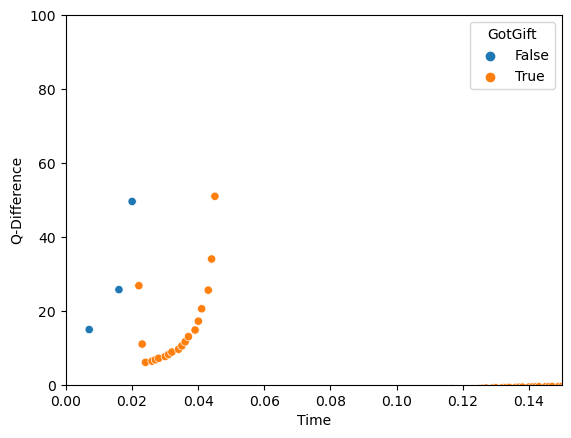

In [6]:
# Create the scatter plot
sns.scatterplot(data=statistics, x="Time", y="Q-Difference", hue="GotGift")

# Set the limits of x and y axes
plt.ylim(0, 100)
plt.xlim(0, 0.15)
# Show the plot
plt.show()

In [7]:
statistics.to_csv("trial_5.csv")